Lyubanov Artem, KVBO-06-23, Practic 6

Input task number:  2


Best route: [1, 5, 3, 2, 4, 6, 1]
Length of best rout: 165
Lengths of all rout: [141, 128, 140, 166, 165]


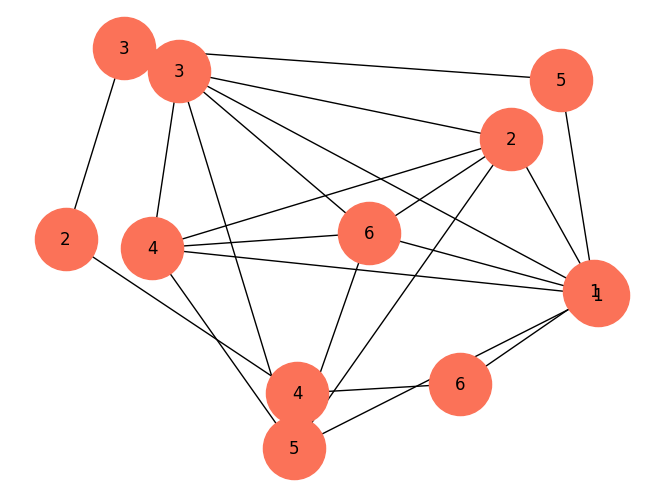

In [2]:
from math import e
import networkx as nx



def q_z(x, y):
    return (x + 3 * y) / (x ** 2 + y ** 2 + 1)


def q_sum_z(z):
    return sum(z)


def exchange_scheme(last_x, last_y, sorted_id_array):
    x = [0 for _ in range(4)]
    y = [0 for _ in range(4)]

    x[2] = last_x[sorted_id_array[2]]
    x[3] = last_x[sorted_id_array[2]]

    x[0] = last_x[sorted_id_array[0]]

    x[1] = last_x[sorted_id_array[1]]

    y[0] = last_y[sorted_id_array[2]]
    y[1] = last_y[sorted_id_array[2]]
    y[2] = last_y[sorted_id_array[0]]
    y[3] = last_y[sorted_id_array[1]]

    return x, y


def sorting(z):
    sorted_id_array = sorted(range(len(z)), key=lambda k: z[k])

    return sorted_id_array


def evo_step(x, y, z):
    _, min_id = min((value, id) for (id, value) in enumerate(z))
    x = x[:]
    y = y[:]
    z = z[:]

    x.pop(min_id)
    y.pop(min_id)
    z.pop(min_id)

    return x, y, z


def evo_steps(x, y, steps_num=4):
    results = []

    for i in range(4):
        arr_z = [q_z(x, y[i]) for i, x in enumerate(x)]

        x, y, z = evo_step(x, y, arr_z)

        x, y = exchange_scheme(x, y, sorting(z))

        results.append([x, y, q_sum_z(arr_z), arr_z])

    return x, y, results


def task_1():
    x = [-5, -3, -2, -1]
    y = [-1, -2, 0, 1]
    results = evo_steps(x, y)

    for i in range(len(results[2])):
        print(f'max_{i + 1}_step: {results[2][i][2]}')

    quality_array_z = []
    for i in range(len(results[2])):
        quality_array_z += results[2][i][3]

    print(f'max Z: {max(quality_array_z)}')


def probability(delta, t):
    return 100 * e ** (-delta / t)


def reduct_temp(prev_t):
    return 0.5 * prev_t


def edge_length(i, j, distances, round_trip=True):
    if round_trip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in
                    distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])


def route_length(array_v, distances):
    edges = []

    for i in range(len(array_v) - 1):
        edges.append(edge_length(array_v[i], array_v[i + 1], distances))

    return sum(edges)


def route_one_replacement(array_v, array_z, replacement_by_name=True):
    decrement = 1 if replacement_by_name else 0

    array_v[array_z[0] - decrement], array_v[array_z[1] - decrement] = array_v[array_z[1] - decrement], array_v[array_z[0] - decrement]

    return array_v


def route_replacement(array_v, array_z):
    for i in array_z:
        array_v = route_one_replacement(array_v, i)
    return array_v


def choose_route(distances, array_v, array_z, t, array_p):
    sum_length = route_length(array_v, distances)
    array_sum = [sum_length]
    for i in range(len(array_z)):
        new_v = route_one_replacement(array_v[:], array_z[i])
        new_s = route_length(new_v, distances)
        array_sum.append(new_s)
        delta_s = new_s - sum_length
        if delta_s > 0:
            p = probability(delta_s, t)
            if p > array_p[i]:
                array_v = new_v
                sum_length = new_s
        else:
            array_v = new_v
            sum_length = new_s

            t = reduct_temp(t)

    return array_v, array_sum


def draw_route_graph(distances, best_route):
    new_distances = []
    for i in range(len(best_route) - 1):
        for distance in distances:
            if distance[0] == best_route[i] and distance[1] == best_route[i + 1] or distance[1] == best_route[i] and \
                    distance[0] == best_route[i + 1]:
                new_distances.append(distance)

    graph = nx.Graph()

    graph.add_weighted_edges_from(new_distances)
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)


def task_2():
    distances = [(1, 2, 18),
                 (1, 3, 41),
                 (1, 4, 36),
                 (1, 5, 29),
                 (1, 6, 19),
                 (2, 3, 27),
                 (2, 4, 31),
                 (2, 5, 37),
                 (2, 6, 15),
                 (3, 4, 19),
                 (3, 5, 42),
                 (3, 6, 23),
                 (4, 5, 24),
                 (4, 6, 17),
                 (5, 6, 24)]
    array_v = [1, 3, 4, 5, 6, 2, 1]
    array_z = [(2, 4),
               (3, 4),
               (4, 6),
               (5, 6)]
    array_p = [63, 49, 45, 53]
    t = 100

    graph = nx.Graph()
    graph.add_weighted_edges_from(distances)

    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)
    

    best_route, arr_length = choose_route(distances, array_v, array_z, t, array_p)

    print(f'Best route: {best_route}')
    print(f'Length of best rout: {route_length(best_route, distances)}')
    print(f'Lengths of all rout: {arr_length}')

    draw_route_graph(distances, best_route)


tasks = [task_1, task_2]
tasks[int(input("Input task number: ")) - 1]()
